# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset y Exploracón de Datos

Fuente de Datos
Los datos provienen de la página data.buenosaires.gob.ar. Es una página oficial del gobierno de la provincia de Buenos Aires que contiene Datasets referidos a distintos temas y son de acceso público.
Los Datasets del Flujo Vehicular por Unidades de Peaje AUSA se encuentran disponibles a partir del año 2008 hasta el año 2021 (completo hasta 01/12/2021) y estan acompañados con información adicional. De ahí sabemos que la frecuencia de actualización es mensual, el responsable de los datos es Autopistas Urbanas (AUSA), Secretaría de Transporte y Obras Públicas, Jefatura de Gabinetes de Ministros; y el organismo encargado de mantenimiento es la Gerencia Operativa de Ingeniería de Datos, Secretaría de Innovación y Transformación Digital, Jefatura de Gabinetes de Ministros.
Los datasets hacen referencia a la información del paso de vehículos por las unidades de peaje AUSA. No hay información extra sobre los distintos atributos o columnas. De todas maneras es de fácil interpretación.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px

In [3]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [4]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [5]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [6]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [7]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [8]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [9]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [10]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [11]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [12]:
dataset.tail(5)

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
1372316,2017-12-31,22,Domingo,Provincia,Pesado,8
1372319,2017-12-31,23,Domingo,Provincia,Liviano,8
1372320,2017-12-31,23,Domingo,Provincia,Liviano,148
1372324,2017-12-31,23,Domingo,Provincia,Pesado,1
1372326,2017-12-31,23,Domingo,Provincia,Pesado,1


In [13]:
#Vemos los datos nulos
dataset.isnull().sum()

fecha             0
hora_fin          0
dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
dtype: int64

In [14]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset1=dataset.copy()
dataset1['fecha2'] = pd.to_datetime(dataset1.fecha) + pd.to_timedelta(dataset1.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset1.drop(columns=['fecha','hora_fin'], inplace = True)

dataset1.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [15]:
#Corregimos el nombre de fecha2 a fecha
dataset1.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset1.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [16]:
#Reordenamos el dataset por fecha
dataset1.sort_values('fecha', inplace = True)
dataset1.reset_index(drop=True, inplace = True)
dataset1

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


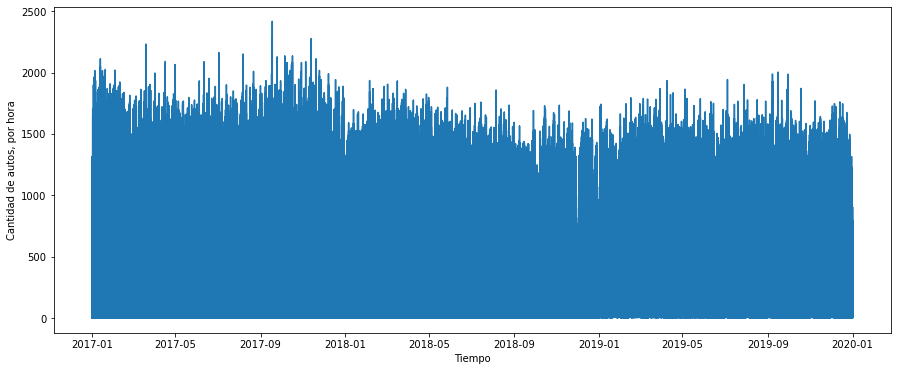

In [17]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset1.fecha, dataset1.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

Se observa una tendencia decreciente de la serie desde principios de 2017 a fines de 2018 y luego una leve recuperación a principios de 2019 con una posterior estabilización. A primera vista se pueden reconocer los bloques de cada año y podría deberse a que cada uno de los 3 dataset contiene información no cien por ciento homogénea con los demás. Es decir pueden estar construídos con diferentes metodologías o teniendo en cuenta diferentes aspectos.
Sin embargo también puede deberse a la creación de nuevos puntos de peajes o causas similares y en ese caso la información que nos dan los datos si estaría reflejando la realidad.

In [18]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset1.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head(5)

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


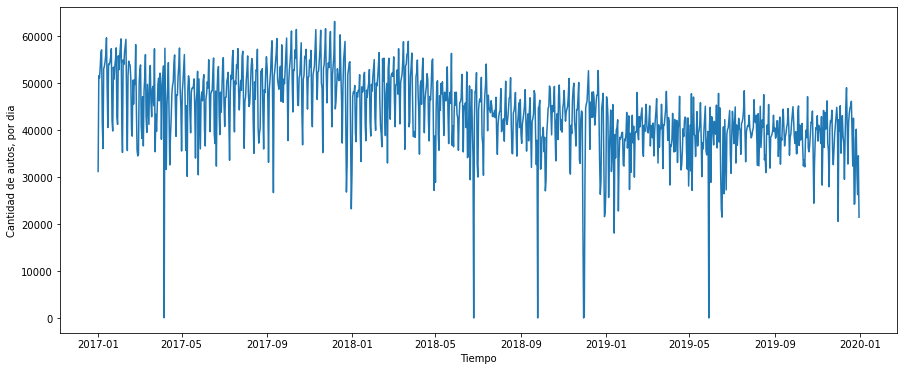

In [19]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [20]:
#Observamos los estadisticos descriptivos de la variable cantidad de pasos
diario.describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).round(2)

,cantidad_pasos
count,1095.00
mean,43712.86
std,8192.74
min,0.00
1%,21553.60
5%,31194.20
25%,39061.50
50%,43761.00
75%,49498.00
95%,56016.10


<AxesSubplot:xlabel='cantidad_pasos', ylabel='Count'>

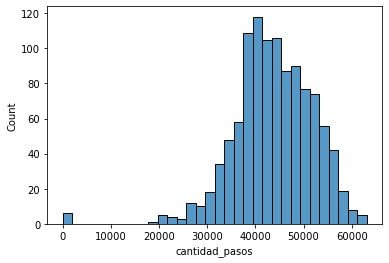

In [21]:
#Graficamos la distribucion de probabilidad
sns.histplot(data=diario,x='cantidad_pasos')

Se observa un intervalo atipico. Vamos a ver a que fechas corresponden

In [22]:
diario.sort_values('cantidad_pasos',inplace=True)#.head(10)
diario.head(10)

,cantidad_pasos
fecha,
2018-06-25,0
2018-09-25,0
2018-11-30,0
2019-05-29,0
2017-04-06,40
2018-12-01,350
2019-01-13,18076
2018-11-29,19728
2019-12-01,20553


Las primeras 6 fechas parecen tener valores que no son correctos. Podria deberse a cortes en esa autopista y por lo tanto no hubo circulacion, o a otras razones similares. Pero a los fines de la prediccion a futuro esto no es relevante por lo que vamos a imputar los datos con la media del dia de la semana al que corresponden

In [23]:
dia_fecha1 = dataset.copy()
dia_fecha1['fecha2'] = pd.to_datetime(dataset.fecha)
dia_fecha = dia_fecha1.set_index('fecha2')['dia'].to_dict()

In [24]:
diario['dia']=np.nan
diario.dia.fillna(dia_fecha,inplace=True)
diario.loc['2018-06-25','dia'] ='Lunes'
diario.loc['2018-09-25','dia'] ='Martes'
diario.loc['2018-11-30','dia']='Viernes'
diario.loc['2019-05-29','dia']='Miércoles'
diario.head(10)

,cantidad_pasos,dia
fecha,,
2018-06-25,0,Lunes
2018-09-25,0,Martes
2018-11-30,0,Viernes
2019-05-29,0,Miércoles
2017-04-06,40,Jueves
2018-12-01,350,Sábado
2019-01-13,18076,Domingo
2018-11-29,19728,Jueves
2019-12-01,20553,Domingo


In [25]:
lista=diario.index[:6]
diario.loc[lista,'cantidad_pasos'] =np.nan
diario.head(10)

,cantidad_pasos,dia
fecha,,
2018-06-25,NaN,Lunes
2018-09-25,NaN,Martes
2018-11-30,NaN,Viernes
2019-05-29,NaN,Miércoles
2017-04-06,NaN,Jueves
2018-12-01,NaN,Sábado
2019-01-13,18076.0,Domingo
2018-11-29,19728.0,Jueves
2019-12-01,20553.0,Domingo


In [26]:
prom_dia = diario.groupby(['dia']).mean('cantidad_pasos').to_dict()['cantidad_pasos']
prom_dia

{'Domingo': 36891.47133757962,
 'Jueves': 47110.50967741935,
 'Lunes': 42893.506410256414,
 'Martes': 44009.942307692305,
 'Miércoles': 45971.13548387097,
 'Sábado': 41557.1935483871,
 'Viernes': 49337.23870967742}

In [27]:
diario.reset_index(drop=False,inplace=True)
diario.set_index('dia',inplace=True)
diario.cantidad_pasos.fillna(prom_dia,inplace=True)
diario.sort_values('fecha', inplace = True)
diario.set_index('fecha',inplace=True)
diario

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0
...,...
2019-12-27,40182.0
2019-12-28,30681.0
2019-12-29,26259.0


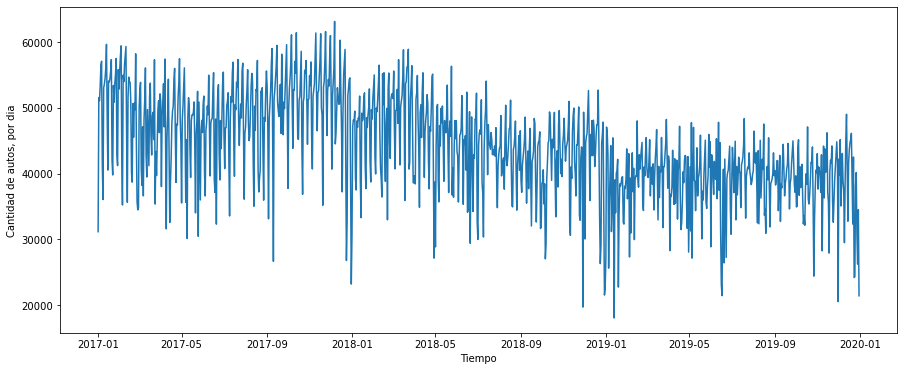

In [28]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

<AxesSubplot:xlabel='cantidad_pasos'>

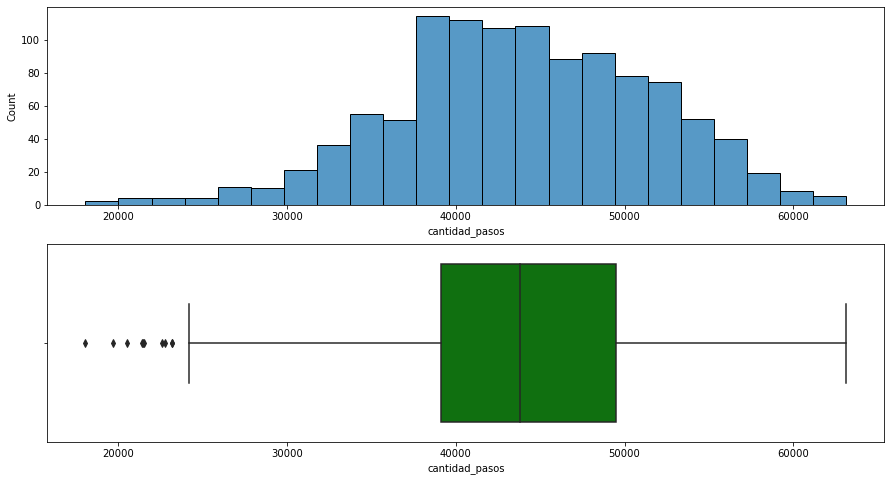

In [29]:
#Graficamos la distribucion
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
sns.histplot(data=diario,x='cantidad_pasos')

plt.subplot(2,1,2)
sns.boxplot(data = diario, x = 'cantidad_pasos', color = 'green')

In [30]:
#Vemos cual es el dia de la semana que tiene mas circulacion
por_dia = dataset1.groupby(['dia']).sum('cantidad_pasos')
por_dia.sort_values('cantidad_pasos',ascending=False, inplace=True)
por_dia

,cantidad_pasos
dia,
Viernes,7647272
Jueves,7302169
Miércoles,7125526
Martes,6865551
Lunes,6691387
Sábado,6441715
Domingo,5791961


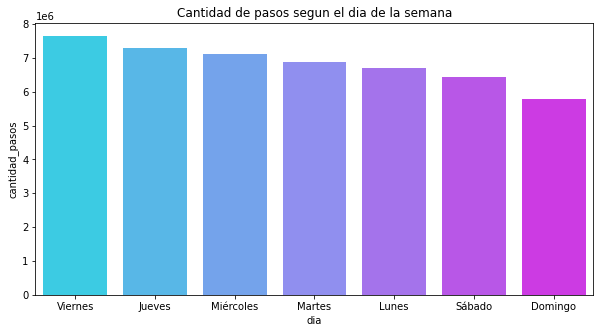

In [31]:
#Graficamos
plt.figure(figsize=(10,5))
sns.barplot(data=por_dia, x=por_dia.index, y='cantidad_pasos', palette='cool')
plt.title('Cantidad de pasos segun el dia de la semana')
plt.show()

In [32]:
#Utiizamos la variable dataset para ver saber culaes son las horas con mas circulacion
por_hora = dataset.groupby('hora_fin').sum('cantidad_pasos')
por_hora

,cantidad_pasos
hora_fin,
0,1057141
1,879116
2,614594
3,429898
4,334860
5,411330
6,781617
7,1564013
8,2276977


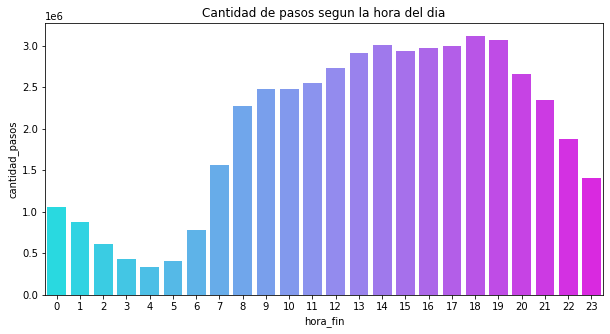

In [33]:
#Graficamos
plt.figure(figsize=(10,5))
sns.barplot(data=por_hora, x=por_hora.index, y='cantidad_pasos', palette='cool')
plt.title('Cantidad de pasos segun la hora del dia')
plt.show()

Vemos un resampleo semanal

In [34]:
diario.reset_index(drop=False,inplace=True)

In [35]:
semanal = diario.resample('W', on = 'fecha').sum()
semanal.head()

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-08,347212.0
2017-01-15,366413.0
2017-01-22,357215.0
2017-01-29,354581.0


In [76]:
grafico_sem = px.line(semanal, title= 'Autocorrelacion')
grafico_sem.update_layout(xaxis={"title": "Tiempo"},yaxis={"title": "Cantidad de autos, por semana"})
grafico_sem.show()

Vamos a ver la autocorrelacion

In [37]:
from statsmodels.tsa.stattools import acf

nlags =  365*3
autocorr = acf(diario.cantidad_pasos, nlags = nlags)
autocorr.shape

(1095,)

In [38]:
grafico_corr = px.scatter(autocorr, title= 'Autocorrelacion')
grafico_corr.update_layout(xaxis={"title": "Lag"},yaxis={"title": "Correlacion"})
grafico_corr.show()

### Componentes de la serie

Para descomponer la serie vamos a utilizar el dataset semanal

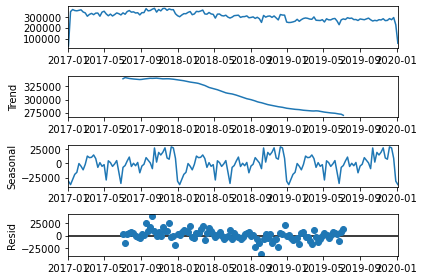

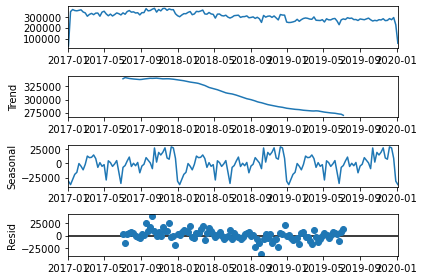

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(semanal, model='additive', period=(int(365/7)))
result.plot()

In [75]:
grafico1 = px.line(result.trend)
grafico1['data'][0]['line']['color']='rgb(0, 255, 0)'
grafico1.show()

In [73]:
grafico4 = px.line(result.seasonal)
grafico4.show()


In [54]:
grafico2 = px.line(result.resid)
grafico2.show()


In [80]:
fig1 = go.Figure(data=grafico_sem.data + grafico1.data)
fig1.update_yaxes(range=[220000,380000])
fig1.show()

Al descomponer la serie observamos los siguientes aspectos:
* Tendencia: Existe una clara tenedencia negativa, esto puede ser por apertura de nuevas rutas o por migración a otras formas de pago. Si ninguna de estas razones puede demostrarse entonces puede deberse a diferencias en la construcción del dataset.
* Estacionalidad: Se observan menor circulación en enero aumentando hasta marzo y volviendo a bajar hasta mitad de año. A partir de ahí aumenta hasta fin de año. Se destacan los bajos valores de cantidad de pasos para los días 24 y 31 de Diciembre.

Vamos a probar la hipótesis de que la tendencia es negativa debido a la migración a otras formas de pago

In [44]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_2 = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia
mask = (dataset_2.estacion=='Illia')
dataset_2 = dataset_2[mask]

#Quitamos las columnas que no vamos a utilizar
dataset_2.drop(columns = ['periodo','hora_inicio', 'estacion'], inplace = True)

dataset_2.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
19,2019-01-01,1,Martes,Centro,Liviano,NO COBRADO,146
20,2019-01-01,1,Martes,Centro,Liviano,TELEPASE,59
21,2019-01-01,1,Martes,Centro,Pesado,TELEPASE,1
22,2019-01-01,1,Martes,Provincia,Liviano,NO COBRADO,147
23,2019-01-01,1,Martes,Provincia,Liviano,TELEPASE,106


In [45]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset2=dataset_2.copy()
dataset2['fecha2'] = pd.to_datetime(dataset_2.fecha) + pd.to_timedelta(dataset_2.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset2.drop(columns=['fecha','hora_fin'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
dataset2.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el dataset por fecha
dataset2.sort_values('fecha', inplace = True)
dataset2.reset_index(drop=True, inplace = True)
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario2 = dataset2.resample('D', on = 'fecha').sum()
print(diario2.shape)
diario2.head(5)

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,45478
2017-01-02,89289
2017-01-03,92602
2017-01-04,95813
2017-01-05,100044


In [46]:
diario2.sort_values(by = 'cantidad_pasos')

,cantidad_pasos
fecha,
2018-11-30,387
2018-12-01,1121
2019-01-13,33529
2017-12-31,35435
2019-12-01,35587
...,...
2018-03-23,122528
2018-03-22,122955
2018-03-21,123380


Hacemos una rapida imputacion de los dos primeros valores que son atpicos. Les colocamos el valor minimo siguiente

In [47]:
diario2.loc['2018-11-30','cantidad_pasos'] =33529
diario2.loc['2018-12-01','cantidad_pasos'] =33529

In [55]:
#Convertimos en semanas
diario2 = diario2.reset_index()
semanal2 = diario2.resample('W', on = 'fecha').sum()

In [63]:
grafico3 = px.line(semanal2)
grafico3.update_xaxes(range=['2017-02','2019-11'])
grafico3.show()

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

result2 = seasonal_decompose(semanal2, model='additive', period=(int(365/7)))
grafico2 = px.line(result2.trend)
grafico2['data'][0]['line']['color']='rgb(0, 255, 0)'
grafico2.show()

In [65]:
import plotly.graph_objects as go

In [72]:
fig3 = go.Figure(data=grafico2.data + grafico3.data)
fig3.update_yaxes(range=[520000,750000])
fig3.show()

La línea de tendencia es diferente a la que obteniamos sólo con pago en efectivo. Si bien parece haber una ligera tendencia negativa desde marzo de 2018, no parece significativa y la línea verde en general se mantiene más bien estable. 
Podríamos aceptar la hipótesis de que la tendencia negativa de pasos que se pagan en efectivo no se refleja en la cantidad de pasos totales, y por lo tanto se debe a una migración a otros medios de pago. 

### Transformación de Datos

Las transformaciones de datos necesarias ya fueron realizadas durante el análisis exploratorio. Éstas fueron: detección de outliers e imputación de los mismos.

## Modelos Predictivos

### Modelo Benchmark

In [85]:
from statsmodels.tsa.api import VAR